In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

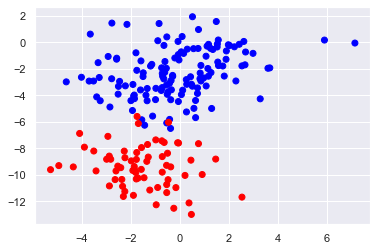

In [20]:
# Create a dataset with 50 points in each class, one gaussian distributions
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.5, random_state=2)
color = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=color)
plt.show()

In [21]:
# Create a model Linear Discriminant Analysis (LDA)
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Compute the mean of each class
        mean_vectors = []
        for cl in class_labels:
            mean_vectors.append(np.mean(X[y == cl], axis=0))
        # Compute the within-class scatter matrix
        S_W = np.zeros((n_features, n_features))
        for cl, mv in zip(class_labels, mean_vectors):
            class_sc_mat = np.zeros((n_features, n_features))  # scatter matrix for every class
            for row in X[y == cl]:
                row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
                class_sc_mat += (row - mv).dot((row - mv).T)
            S_W += class_sc_mat
        # Compute the between-class scatter matrix
        overall_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for i, mean_vec in enumerate(mean_vectors):
            n = X[y == i + 1, :].shape[0]
            mean_vec = mean_vec.reshape(n_features, 1)
            overall_mean = overall_mean.reshape(n_features, 1)
            S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)   
        # Compute the eigenvectors and corresponding eigenvalues
        eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        # Sort the eigenvectors by decreasing eigenvalues
        eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
        eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
        # Store the linear discriminants
        self.linear_discriminants = np.array([eigen_pairs[i][1] for i in range(self.n_components)])

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)


In [22]:
# Project the data onto the linear discriminants
lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)

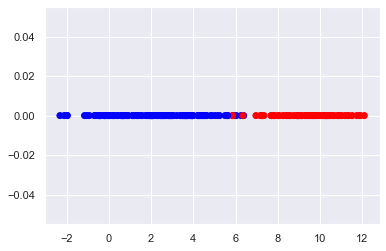

In [23]:
# Plot the data
x1 = X_projected[:, 0] # x1 is the first column of X_projected
plt.scatter(x1, np.zeros((len(X_projected))), c=color)
plt.show()

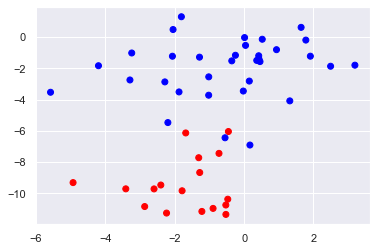

In [24]:
# Create a test dataset with 50 points in each class, one gaussian distributions
X_test, y_test = make_blobs(n_samples=50, n_features=2, centers=3, cluster_std=1.5, random_state=2)
color_test = ['red' if i == 0 else 'blue' for i in y_test]
plt.scatter(X_test[:, 0], X_test[:, 1], c=color_test)
plt.show()

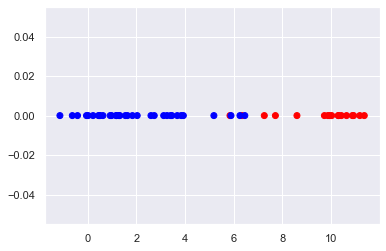

In [25]:
# Project the test data onto the linear discriminants
X_test_projected = lda.transform(X_test)

# Plot the test data
x1_test = X_test_projected[:, 0] # x1 is the first column of X_test_projected
plt.scatter(x1_test, np.zeros((len(X_test_projected))), c=color_test)
plt.show()